## Predicting Customer response to Personal Loan Ad-Campaign

#### Dataset
The dataset is available at <strong>"data/personal_loan.csv"</strong> in the respective challenge's repo.<br>
Original Dataset : https://www.kaggle.com/itsmesunil/bank-loan-modelling

#### Features (X)
1. Age - Customer's age in completed years. (Numeric)
2. Experience - No. of years of professional experience (Numeric)
3. Income - Annual income of the customer. (Numeric)
4. ZIPCode - Home Address ZIP code. (Numeric)
5. Family - Family size of the customer. (Numeric)
6. CCAvg Avg. - Spending on credit cards per month (Numeric)
7. Education  - 
    - Education Level (Categorical|Multiclass):
        - 1: Undergrad
        - 2: Graduate
        - 3: Advanced/Professional 
8. Mortgage - Value of house mortgage if any. (Numeric)
9. Securities Account - Does the customer have a securities account with the bank? (Categorical | Binary)
10. CD Account - Does the customer have a certificate of deposit (CD) account with the bank? (Categorical | Binary)
11. Online - Does the customer use internet banking facilities? (Categorical | Binary)
12. CreditCard - Does the customer uses a credit card issued by UniversalBank? (Categorical | Binary)

#### Target (y)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign? (Binary)

#### Objective
- To apply Logistic Regression and Decision Tree Algorithms on the given imbalanced dataset. and compare the algorithms used on our dataset on the basis of appropriately used evaluated metrics while presenting a summarized analysis of what you find.

#### Tasks
- Download and load the data (csv file).
- Process the data according to guidelines given in the comments of the respective cells.
- Split the dataset into 80% for training and rest 20% for testing. (sklearn.model_selection.train_test_split function).
- Initialize Logistic Regression and Decision Tree Models (With parameters given in the cell).
- Train the models on the same dataset.
- Compute the confusion matrix for both models and compare.
- Compute a classification report (Precision, Recall and F-1 score) for both models and compare. 
- Compute and plot the ROC Curve of both curves and simultaneously compute the ROC-AUC for both models and thereby compare.
- Summarize your findings and give reasoning for your results (comparing task_1 and task_2).

#### Further Fun (will not be evaluated)
- Train model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe accuracies on both X_train and X_test.
- Shuffle training samples with different random seed values in the train_test_split function. Check the model error for the testing data for each setup.
- Explore ways to deal with imbalanced dataset. Use different methods (such as eliminating outliers and such) to experiment with the given dataset.

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Differences between Logistic Regression and a Decision Tree: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/
- When are Decision Trees better than Logistic Regression?: https://www.displayr.com/decision-trees-are-usually-better-than-logistic-regression
- How to choose between Logistic Regression and Decision Trees given a dataset: https://datascience.stackexchange.com/questions/6048/should-i-use-a-decision-tree-or-logistic-regression-for-classification
- Decision Tree Classifier by Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Understanding classification metrics like Precision, Recall, F-Scores and Confusion matrices: https://nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/
- Understanding the ROC Curve: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g


In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
from google.colab import files
uploaded = files.upload()

Saving personal_loan.csv to personal_loan (1).csv


In [32]:
data = pd.read_csv('personal_loan (1).csv')

In [33]:
# Print the dataframe rows just to see some samples
data.head(15)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,1,0,0,0,0
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,1,0,0,0,0
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1


In [34]:
# Print shape of the dataframe
print(data.shape)

(5000, 13)


In [35]:
# Take a look at the distribution of target variable (Below is an example of what we mean)
print(data['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


### This is an imbalanced dataset, as shown above

In [36]:
# Print info about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   CreditCard          5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB
None


In [37]:
# Fill Missing Values (if any)
data.replace(np.NaN,data.mean(),inplace=True)

In [38]:
# Label Encode Categorical Columns (if required)
# Not doing this operation

In [39]:
# Normalize/Standardize numerical columns
from sklearn import preprocessing
df=data.loc[:,data.columns!='Personal Loan']
x=df.values
mm=preprocessing.MinMaxScaler()
x1=mm.fit_transform(x)
df=pd.DataFrame(x1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.0,0.0,1.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.0,0.0,1.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.0,1.0,0.0,0.0,0.0


In [40]:
# One hot encode columns with multiple categories
# Use pd.get_dummies(), concatenate that with the original dataset, and drop the column (keeping only the dummy columns)
# Use link given in the "Helpful Links" section for help
from sklearn.preprocessing import OneHotEncoder 
df=pd.get_dummies(df,columns=[6]) 
df.head()

,0,1,2,3,4,5,7,8,9,10,11,6_0.0,6_0.5,6_1.0
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,1,0,0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,1,0,0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,1,0,0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.0,0.0,0.0,0.0,0.0,0,1,0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.0,1.0,0.0,0.0,0.0,0,1,0


In [41]:
data=pd.concat([df,data['Personal Loan']],sort=False,axis=1)
data.head(15)

,0,1,2,3,4,5,7,8,9,10,11,6_0.0,6_0.5,6_1.0,Personal Loan
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.000000,0.0,1.0,0.0,0.0,1,0,0,0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.000000,0.0,1.0,0.0,0.0,1,0,0,0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.000000,0.0,0.0,0.0,0.0,1,0,0,0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.000000,1.0,0.0,0.0,0.0,0,1,0,0
5,0.318182,0.347826,0.097222,0.948136,1.000000,0.04,0.244094,0.0,0.0,0.0,1.0,0,1,0,0
6,0.681818,0.652174,0.296296,0.943442,0.333333,0.15,0.000000,0.0,0.0,0.0,1.0,0,1,0,0
7,0.613636,0.586957,0.064815,0.968996,0.000000,0.03,0.000000,1.0,0.0,0.0,0.0,0,0,1,0
8,0.272727,0.282609,0.337963,0.924872,0.666667,0.06,0.163780,0.0,0.0,0.0,1.0,0,1,0,0
9,0.250000,0.260870,0.796296,0.958463,0.000000,0.89,0.000000,0.0,0.0,0.0,0.0,0,0,1,1


In [42]:
# Shuffling 
data = data.sample(frac=1).reset_index(drop=True)

In [43]:
# Define Feature Columns as X and Target Column as y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [44]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression Model

In [45]:
# Initializing the model
log_reg = LogisticRegression()

In [47]:
# Train the model
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Make Predictions on the test data (log_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
log_pred = log_reg.predict(X_test)
log_prob = log_reg.predict_proba(X_test)

### Decision Tree Model

In [49]:
# Initializing the model
d_tree = DecisionTreeClassifier()

In [50]:
# Train the model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
# Make Predictions on the test data (dt_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
dt_pred = d_tree.predict(X_test)
dt_prob = d_tree.predict_proba(X_test)

## Evaluating Our Models

In [52]:
# Confusion matrix for Logistic Regression Model
print(confusion_matrix(y_test,log_pred))

[[896   9]
 [ 32  63]]


In [53]:
# Confusion matrix for Decision Tree Model
print(confusion_matrix(y_test,dt_pred))

[[902   3]
 [  7  88]]


### <b>Think</b> : Would accuracy_score be a good evaluation metric, given that the dataset is imbalanced?

In [ ]:
# Since the dataset is imbalanced, we evaluate our model using F1-Score

In [54]:
# F1-Score for Logistic Regression Model
print(f1_score(y_test,log_pred))

0.7544910179640719


In [55]:
# F1-Score for Decision Tree Model
print(f1_score(y_test,dt_pred))

0.946236559139785


In [56]:
# Classification report for Logistic Regression Model
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       905
           1       0.88      0.66      0.75        95

    accuracy                           0.96      1000
   macro avg       0.92      0.83      0.87      1000
weighted avg       0.96      0.96      0.96      1000



In [64]:
# Classification report for Decision Tree Model
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       905
           1       0.97      0.93      0.95        95

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



### Plotting the ROC Curve and computing the ROC-AUC

In [ ]:
#ROC-AUC curve is a performance measurement for classification problems at various thresholds settings.

In [62]:
#Calculate False Positive Rate and True Positive Rate for y_test
fpr1, tpr1, thresh1 = roc_curve(y_test,log_pred,pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test,dt_pred,pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

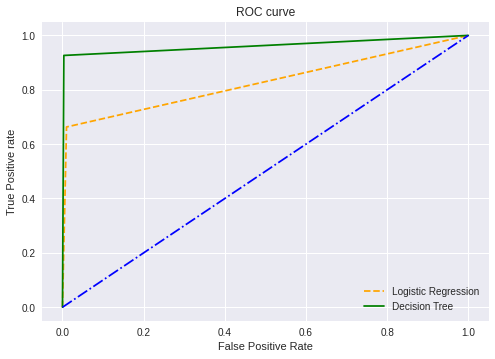

In [65]:
#Plot ROC Curve (TPR vs FPR)
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='-.', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

In [66]:
#Print ROC-AUC scores for both models
auc_score1 = roc_auc_score(y_test,log_pred)
auc_score2 = roc_auc_score(y_test,dt_pred)

print("ROC-AUC Score for Logistic Regression: ",auc_score1)
print("ROC-AUC Score for Decision Tree: ",auc_score2)

ROC-AUC Score for Logistic Regression:  0.8266065716778133
ROC-AUC Score for Decision Tree:  0.9615004361733063


## Conclusive Analysis

Summarize your findings and give reasoning for the results you obtained from task_1 and task_2 and compare the algorithms utilized based on the evaluations metrics used.

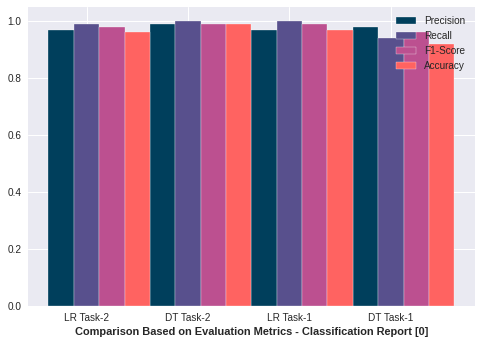

In [90]:
# Summarization of the results from the metrics based on the classification report - [0]
barWidth = 0.25

bars1 = [0.97, 0.99, 0.97, 0.98]
bars2 = [0.99, 1, 1, 0.94]
bars3 = [0.98, 0.99, 0.99, 0.96]
bars4 = [0.96, 0.99, 0.97, 0.92]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#003f5c', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#58508d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#bc5090', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#ff6361', width=barWidth, edgecolor='white', label='Accuracy')

plt.xlabel('Comparison Based on Evaluation Metrics - Classification Report [0]', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['LR Task-2', 'DT Task-2', 'LR Task-1', 'DT Task-1'])
 
plt.legend()
plt.show()


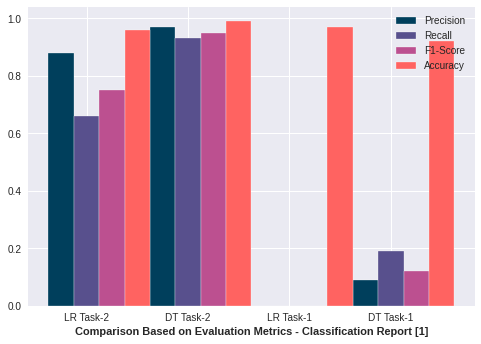

In [89]:
# Summarization of the results from the metrics based on the classification report - [1]
barWidth = 0.25

bars1 = [0.88, 0.97, 0.0, 0.09]
bars2 = [0.66, 0.93, 0.0, 0.19]
bars3 = [0.75, 0.95, 0.0, 0.12]
bars4 = [0.96, 0.99, 0.97, 0.92]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#003f5c', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#58508d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#bc5090', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#ff6361', width=barWidth, edgecolor='white', label='Accuracy')

plt.xlabel('Comparison Based on Evaluation Metrics - Classification Report [1]', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['LR Task-2', 'DT Task-2', 'LR Task-1', 'DT Task-1'])
 
plt.legend()
plt.show()
# For LR Task-1 Precision, Recall = 0; Denominator of F1 Score = 0

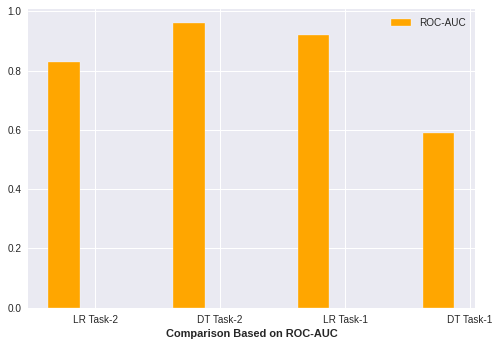

In [92]:
# Summarization of the results based on ROC-AUC
barWidth = 0.25

bars1 = [0.83, 0.96, 0.92, 0.59]
r1 = np.arange(len(bars1))
plt.bar(r1, bars1, color='#ffa600', width=barWidth, edgecolor='white', label='ROC-AUC')

plt.xlabel('Comparison Based on ROC-AUC', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['LR Task-2', 'DT Task-2', 'LR Task-1', 'DT Task-1'])
 
plt.legend()
plt.show()
# wrt Task-2, DT worked well whereas wrt Task-1, LR worked well from the ROC-AUC and Accuracy